#### Full Work Done By Nazifa Tabassum

In [3]:
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
df = pd.read_csv('corona_fake.csv')

df.loc[df['label'] == 'Fake', ['label']] = 'FAKE'
df.loc[df['label'] == 'fake', ['label']] = 'FAKE'
df.loc[df['source'] == 'facebook', ['source']] = 'Facebook'
df.text.fillna(df.title, inplace=True)

df.loc[5]['label'] = 'FAKE'
df.loc[15]['label'] = 'TRUE'
df.loc[43]['label'] = 'FAKE'
df.loc[131]['label'] = 'TRUE'
df.loc[242]['label'] = 'FAKE'

df = df.sample(frac=1).reset_index(drop=True)
df.title.fillna('missing', inplace=True)
df.source.fillna('missing', inplace=True)

df['title_text'] = df['title'] + ' ' + df['text']
df['label'].value_counts()

TRUE    586
FAKE    578
Name: label, dtype: int64

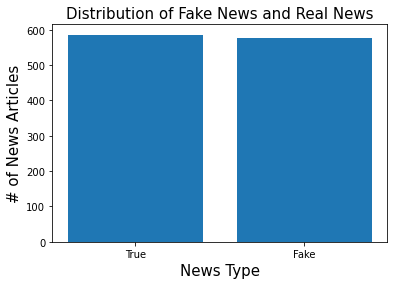

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["True", "Fake"])
y = np.array([586, 578])
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.bar(x,y)
plt.show()

In [18]:
df['title_text'][50]

'How to Protect Yourself & Others There is currently no vaccine to prevent coronavirus disease 2019 (COVID-19). The best way to prevent illness is to avoid being exposed to this virus. The virus is thought to spread mainly from person-to-person. Between people who are in close contact with one another (within about 6 feet). Through respiratory droplets produced when an infected person coughs, sneezes or talks. These droplets can land in the mouths or noses of people who are nearby or possibly be inhaled into the lungs. Some recent studies have suggested that COVID-19 may be spread by people who are not showing symptoms. Clean your hands often. Wash your hands often with soap and water for at least 20 seconds especially after you have been in a public place, or after blowing your nose, coughing, or sneezing. If soap and water are not readily available, use a hand sanitizer that contains at least 60% alcohol. Cover all surfaces of your hands and rub them together until they feel dry. Avo

In [5]:
def preprocessor(text):
    
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text
    
df['title_text'] = df['title_text'].apply(preprocessor)
df['title_text'][50]

'should i get a flu shot while the flu shot wont protect you from developing covid19 its still a good idea most people older than six months can and should get the flu vaccine doing so reduces the chances of getting seasonal flu even if the vaccine doesnt prevent you from getting the flu it can decrease the chance of severe symptoms but again the flu vaccine will not protect you against this coronavirus'

In [6]:
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [7]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)
X = tfidf.fit_transform(df['title_text'])
y = df.label.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5, shuffle=False)

clf = LogisticRegressionCV(cv=5, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=300).fit(X_train, y_train)

fake_news_model = open('fake_news_model.sav', 'wb')
pickle.dump(clf, fake_news_model)
fake_news_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


In [9]:
filename = 'fake_news_model.sav'
saved_clf = pickle.load(open(filename, 'rb'))

saved_clf.score(X_test, y_test)

0.9226804123711341

In [10]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.9226804123711341
              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.92       287
        TRUE       0.92      0.93      0.92       295

    accuracy                           0.92       582
   macro avg       0.92      0.92      0.92       582
weighted avg       0.92      0.92      0.92       582



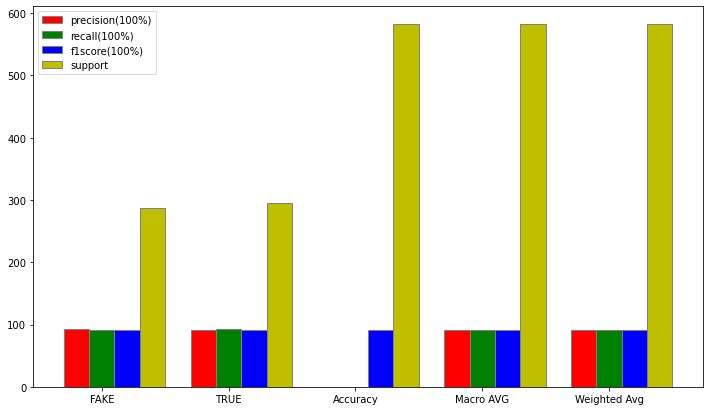

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(12, 7))
 
# set height of bar
precision = [93, 92, 0, 92,92]
recall = [92, 93, 0, 92, 92]
f1score = [92, 92, 92, 92, 92]
support = [287, 295, 582,582,582] 
# Set position of bar on X axis
br1 = np.arange(len(precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3] 
# Make the plot
plt.bar(br1,precision, color ='r', width = barWidth,
        edgecolor ='grey', label ='precision(100%)')
plt.bar(br2,recall , color ='g', width = barWidth,
        edgecolor ='grey', label ='recall(100%)')
plt.bar(br3, f1score, color ='b', width = barWidth,
        edgecolor ='grey', label ='f1score(100%)')
plt.bar(br4, support, color ='y', width = barWidth,
        edgecolor ='grey', label ='support') 
# Adding Xticks
plt.xticks([r + barWidth for r in range(len(precision))],
        ['FAKE', 'TRUE', 'Accuracy', 'Macro AVG', 'Weighted Avg'])
 
plt.legend()
plt.show()